In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
def plot_phase_plane(f, g, x_min, x_max, y_min, y_max, step):
  X_values = np.arange(x_min, x_max, step)
  Y_values = np.arange(y_min, y_max, step)
  Y_grid, X_grid = np.meshgrid(Y_values, X_values)
  X_prime = np.zeros_like(X_grid)
  Y_prime = np.zeros_like(Y_grid)
  rows, cols = np.shape(X_prime)
  # for row in range(rows):
  #   for col in range(cols):
  #     X_prime[row, col] = f(Y_grid[row, col], X_grid[row, col])
  #     Y_prime[row, col] = g(Y_grid[row, col], X_grid[row, col])

  X_prime = f(X_grid, Y_grid)
  Y_prime = g(X_grid, Y_grid)

  # Normalizing
  magnitude = np.sqrt(X_prime**2 + Y_prime**2)
  magnitude[magnitude == 0] = 1
  X_prime /= magnitude
  Y_prime /= magnitude

  return(X_grid, Y_grid, X_prime, Y_prime, magnitude)

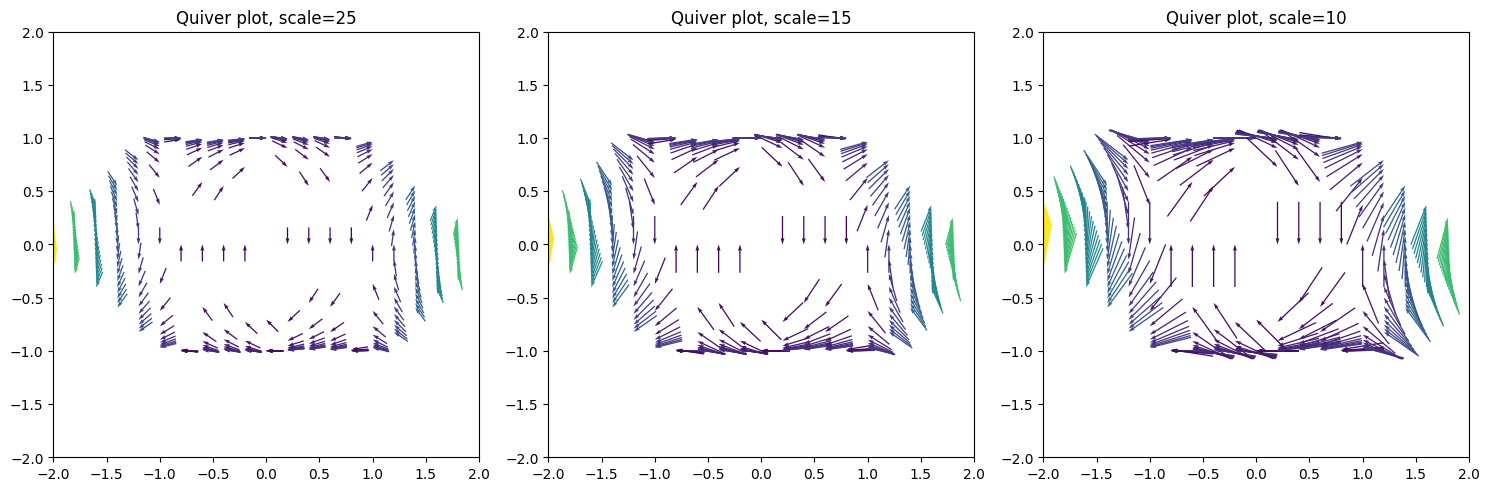

In [18]:
a, b, c, d = 1, 0.1, 0.5, 0.02
f = lambda x, y: y
g = lambda x, y: -x *(1 - (3/2) * (x ** 2) )

x_min = -2
x_max = 2
y_min = -2
y_max = 2

x_grid, y_grid, x_prime, y_prime, m = plot_phase_plane(f, g, x_min, x_max, y_min, y_max, 0.2)

fig, ax = plt.subplots(1, 3, figsize = (15, 10))
cnt = 0
for scale in [25, 15, 10]:
  ax[cnt].quiver(x_grid, y_grid, x_prime, y_prime, m, pivot="tip", scale = scale)
  ax[cnt].set_title(f'Quiver plot, scale={scale}')
  ax[cnt].set_aspect('equal')
  ax[cnt].set_ylim([-2,2])
  ax[cnt].set_xlim([-2,2])
  cnt += 1
plt.tight_layout()
plt.show()

In [ ]:
def runge_kutta(f, g, y_0, x_0, x_min, x_max, y_min, y_max, step):
  Y_d = np.arange(y_min, y_max, step)
  X_d = np.arange(x_min, x_max, step)
  X = [x_0]
  Y = [y_0]
  Y.append(Y[-1] + step * f(Y[-1] + (step/2) * f(Y[-1], X[-1]), X[-1] + (step/2) * g(Y[-1], X[-1])))
  X.append(X[-1] + step * g(Y[-1] + (step/2) * f(Y[-1], X[-1]), X[-1] + (step/2) * g(Y[-1], X[-1])))

In [40]:
# Constants
G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2
c = 299792458.0  # speed of light in m/s
M = 1.989e30     # mass of the black hole in kg (for example, solar mass)



# The view from a distant observer

Distant observer looks at the clock that is at a distance $r$ from a black hole of mass $M$ ticking at a $Δt'$ rate. $Δt$ is the tick from observer

$$\Delta t' = \frac{\Delta t}{\sqrt{1 - \frac{2GM}{c^2r}}}$$

We can plot $\frac{Δt'}{Δt}$

<ipython-input-50-69fdb9b665d2>:5: RuntimeWarning: divide by zero encountered in divide
  rate = lambda r: 1 / np.sqrt(1 - ((2 * G * M) / ((c ** 2) * r)))


(0.0, 10.0)

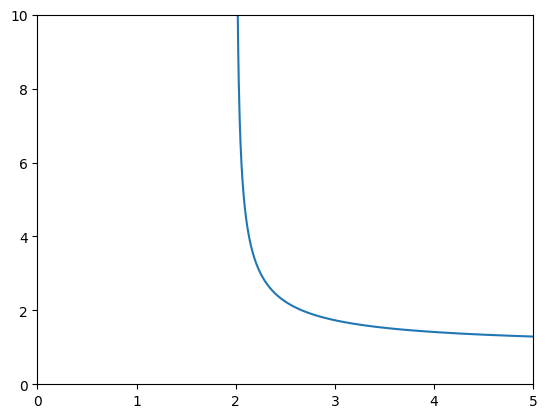

In [50]:
# This plot is fine, just need to make it pretty. 

G = 1
M = 1
c = 1

rate = lambda r: 1 / np.sqrt(1 - ((2 * G * M) / ((c ** 2) * r)))

xx = np.linspace(2, 5, 1000)

plt.plot(xx, rate(xx))
plt.xlim([0, 5])
plt.ylim([0, 10])